### Scaling, Rotating, Shifting and Edge Detection

In [1]:
import cv2

In [2]:
#Scaling an Image 

#Scaling operation increases/reduces size of an image.

image = cv2.imread('cvdata/gray.png')

w,h = image.shape[:2]

image1 = cv2.resize(image, (int(w/2) , int(h/2)), interpolation = cv2.INTER_CUBIC)
cv2.imshow('scaled', image1)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [3]:
#Rotating a Image

image = cv2.imread('cvdata/erode.png')

w,h = image.shape[:2]

matrix = cv2.getRotationMatrix2D((100,100), 5,1)
affined = cv2.warpAffine(image, matrix,(w,h))
cv2.imshow('rotated', affined)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
#Translating/Shifting a Image

#Before we begin we need to define the translation matrix M
# so, if we want to shift the image by (x,y), then the matrix would be as shown below
#    [1 0 x]
#    [0 1 y]      

# so to get this 2d array and store in M , we can use the numpy operation

image = cv2.imread('cvdata/erode.png')

col,row = image.shape[:2]

import numpy as np

M = np.float32([[1,0,50],[0,1,70]])    #here we took x=50 and y=70

translated_image = cv2.warpAffine(image , M , (col , row))
cv2.imshow('translated', translated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [5]:
# Edge Detection in a image

image = cv2.imread('cvdata/chinu.jpg')

edged = cv2.Canny(image,50,200)

cv2.imshow('edged_image', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Morphological Operations : Erosion and Dilation

In [6]:
image = cv2.imread('cvdata/morph.jpg')
cv2.imshow('original', image)
cv2.waitKey(0)

#we need the structuring element, so lets create it using the numpy ones matrix

import numpy as np

kernel1 = np.ones((5,5), np.uint8)
kernel2 = np.zeros((5,5), np.uint8) #Need to study this, and its working

try:
    eroded = cv2.erode(image, kernel1, iterations= 5)
    cv2.imshow('eroded', eroded)
    cv2.waitKey(0)

    dilated = cv2.dilate(image,kernel1, iterations = 5)
    cv2.imshow('dilated', dilated)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
except:
    print('ERROR OCCURED: Check the code again')


##### Analyze an image using Histograms

###### The image should be used in a PNG file as matplotlib supports only PNG images.

What type of histogram you want to see?, From OpenCV Press 1 and From Pyplot Press 2 : 2


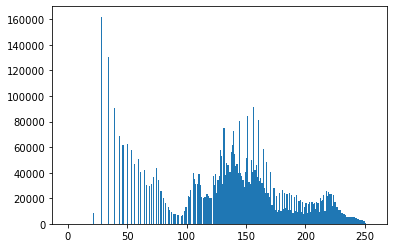

In [8]:
image = cv2.imread('cvdata/hist.png',0)
cv2.imshow('original', image)
cv2.waitKey(3000)
cv2.destroyAllWindows()

import matplotlib.pyplot as plt

hist1= cv2.calcHist([image], [0],None, [256] , [0,256])
hist2= cv2.calcHist([image], [0],None, [32], [0,256])
hist3= cv2.calcHist([image], [0],None, [256] , [0,32])

plots = [hist1, hist2, hist3]

key = int(input("What type of histogram you want to see?, From OpenCV Press 1 and From Pyplot Press 2 : "))

if  key == 1:    
    plt.plot(hist1)
    plt.plot(hist2)
    plt.plot(hist3)

elif key == 2:
    #Histogram with matplotlib.pyplot
    pyhist = plt.hist(image.ravel(),256,[0,256])
else:
    print("Input Error : Plese check the key entered")
plt.show()

##### Histogram Equalization

In [16]:
image = cv2.imread('cvdata/chinu.jpg',0)

equalized = cv2.equalizeHist(image)

stacked = np.hstack((image, equalized))

cv2.imshow('stacked_images', stacked)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Thresholding Techniques

##### Set-1 (Simple Thresholding)

In [45]:
image = cv2.imread('cvdata/chinu.jpg',0)

a, thres1 = cv2.threshold(image, 100 , 255 , cv2.THRESH_BINARY)
a, thres2 = cv2.threshold(image, 150 , 255 , cv2.THRESH_BINARY_INV)
a, thres3 = cv2.threshold(image, 150 , 255 , cv2.THRESH_TOZERO_INV)
a, thres4 = cv2.threshold(image, 120 , 255 , cv2.THRESH_TRUNC)
a, thres5 = cv2.threshold(image, 180 , 255 , cv2.THRESH_TOZERO)

#The output of this threshold value is a tuple where the first value show the given threshold value
#and the second value is the modified array of image



stack = [thres1, thres2, thres3, thres4, thres5]
from time import sleep

for i in range(5):
    cv2.imshow("image{}".format(i+1) , stack[i])
    cv2.waitKey(0)
cv2.destroyAllWindows()

##### Set-2 (Adaptive Thresholding)

In [60]:
image = cv2.imread('cvdata/adthres.jpg',0)

AdThres1 = cv2.adaptiveThreshold(image,255 , cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY , 71 , 5)
AdThres2 = cv2.adaptiveThreshold(image,255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY , 71 , 5)

stack = np.hstack((image,AdThres1, AdThres2))

cv2.imshow('Adaptive_Thresholded_Images', stack)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Set-3 (Otsu Thresholding)

In [64]:
image = cv2.imread('cvdata/otsu.png',0)

a, thres = cv2.threshold(image, 100 , 255 , cv2.THRESH_OTSU)

cv2.imshow("original_Image" , image)
cv2.waitKey(0)  
cv2.imshow("Otsu_threshold" , thres)
cv2.waitKey(0)    
cv2.destroyAllWindows()